# **CLUSTERING**

In [ ]:
# Load the dataset

In [ ]:
import pandas as pd
cars_df=pd.read_csv("/content/cars.csv")

In [ ]:
# Basic information about the data

In [ ]:
cars_df.columns

Index(['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60',
       ' year'],
      dtype='object')

In [ ]:
cars_df.head()

mpg   cylinders   cubicinches   hp   weightlbs   time-to-60   year
0  14.0           8           350  165        4209           12   1972
1  31.9           4            89   71        1925           14   1980
2  17.0           8           302  140        3449           11   1971
3  15.0           8           400  150        3761           10   1971
4  30.5           4            98   63        2051           17   1978

In [ ]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    int64  
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    int64  
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 14.4 KB


In [ ]:
cars_df.isna().sum()

mpg             0
 cylinders      0
 cubicinches    0
 hp             0
 weightlbs      0
 time-to-60     0
 year           0
dtype: int64

In [ ]:
cars_df.describe().T

count         mean         std  ...     50%     75%     max
mpg           261.0    23.144828    7.823570  ...    22.0    28.8    46.6
 cylinders    261.0     5.590038    1.733310  ...     6.0     8.0     8.0
 cubicinches  261.0   200.750958  108.869697  ...   156.0   302.0   455.0
 hp           261.0   106.360153   40.499959  ...    95.0   138.0   230.0
 weightlbs    261.0  3022.134100  857.036976  ...  2904.0  3693.0  4997.0
 time-to-60   261.0    15.547893    2.910625  ...    16.0    17.0    25.0
 year         261.0  1976.819923    3.637696  ...  1977.0  1980.0  1983.0

[7 rows x 8 columns]

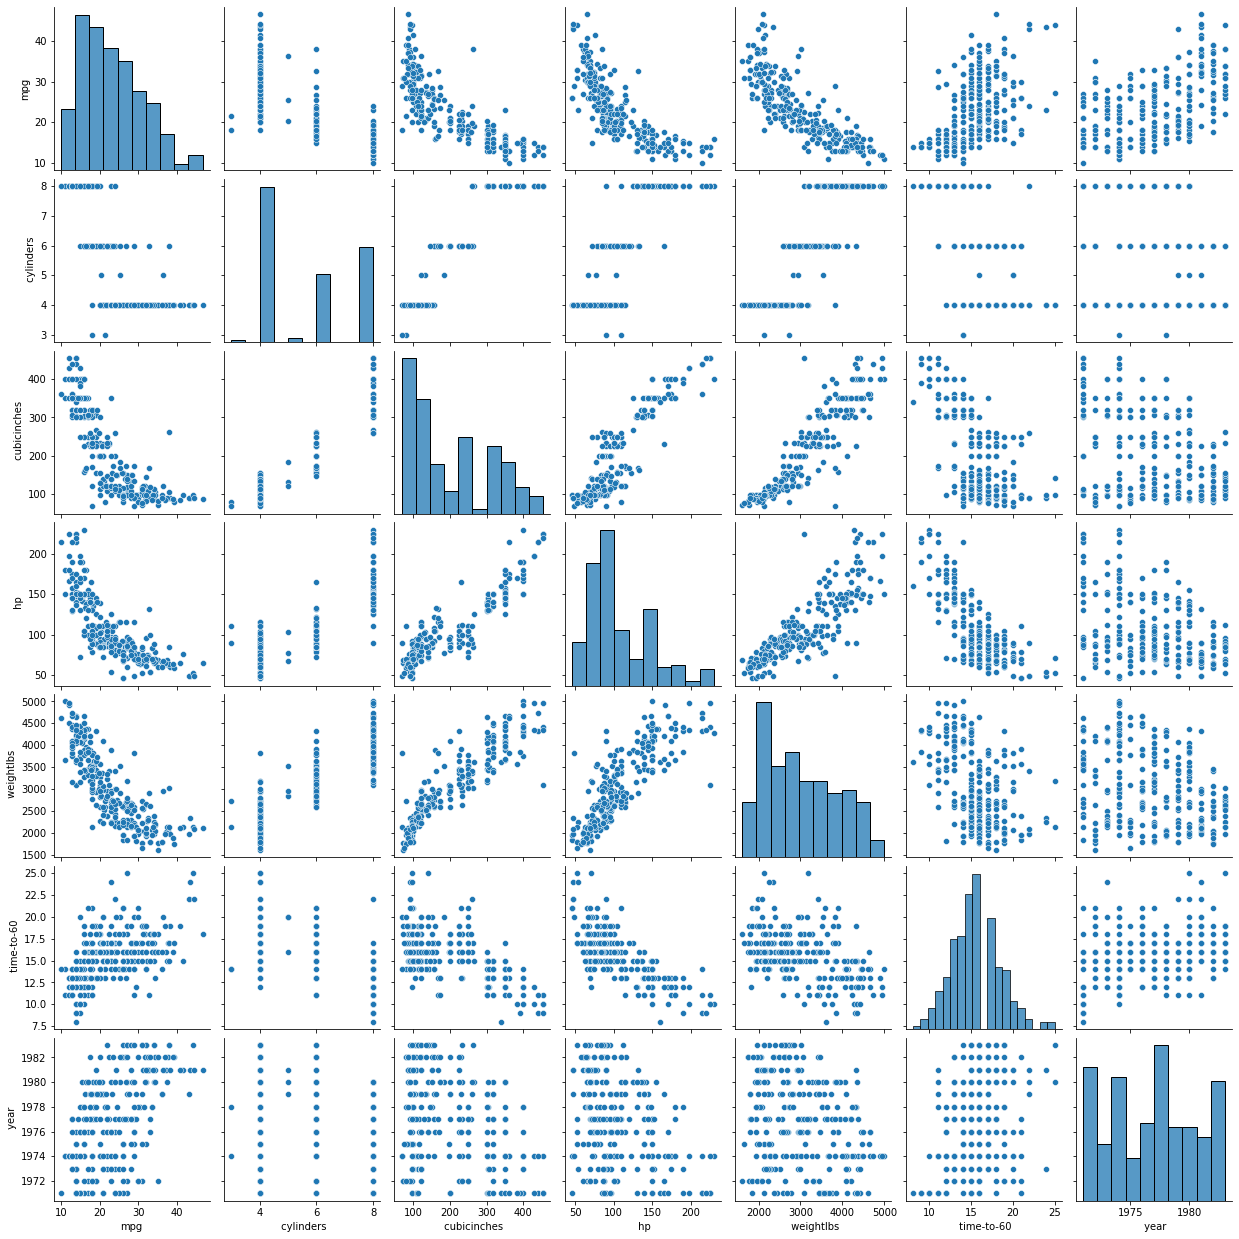

In [16]:
import seaborn as sns
sns.pairplot(cars_df)

## KMeans Clustering

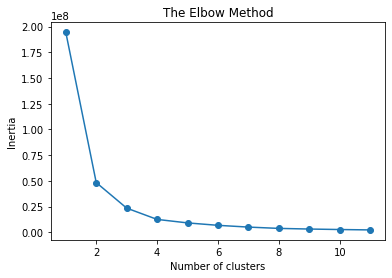

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertia = []
for i in range(1,12):
    model = KMeans(n_clusters = i, init = 'k-means++', random_state = 2)
    model.fit(cars_df)
    inertia.append(model.inertia_)
plt.plot(range(1,12),inertia,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [15]:
# Take the optimun number of clusters as 3

In [17]:
kmeans_model=KMeans(n_clusters=3,init='k-means++',random_state=2)
labels_kmeans=kmeans_model.fit_predict(cars_df)
print(labels_kmeans)

[1 0 2 1 0 1 1 1 2 0 0 0 1 2 1 1 0 2 0 0 0 0 2 1 0 0 0 1 2 0 0 2 0 1 0 2 0
 0 1 2 1 1 2 2 2 0 1 0 0 2 1 2 2 0 1 1 2 0 0 1 2 0 2 0 1 2 0 0 0 1 2 0 0 0
 0 2 2 0 0 0 1 1 2 0 0 0 2 2 0 0 0 0 1 2 0 1 1 2 1 1 1 1 0 0 0 0 0 0 0 2 0
 2 1 0 0 1 2 2 0 1 0 0 1 2 0 0 1 0 0 0 0 0 1 2 1 1 0 2 2 2 0 0 0 0 2 2 2 2
 2 2 0 0 1 2 0 2 0 0 0 2 2 1 2 2 0 2 2 0 2 0 0 2 1 0 0 0 1 2 2 0 2 0 1 2 0
 2 2 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 2 2 0 1 0 2 1 2 2 2 0 0 2 0 0 1 0 1 2 2
 1 1 1 0 1 0 0 2 2 0 0 1 2 0 1 2 0 0 1 2 1 0 1 2 1 0 0 0 0 0 2 1 2 0 1 0 2
 2 2]


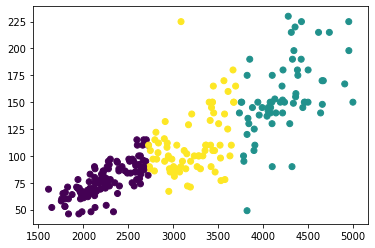

In [18]:
plt.scatter(cars_df[' weightlbs'],cars_df[' hp'],c=labels_kmeans)

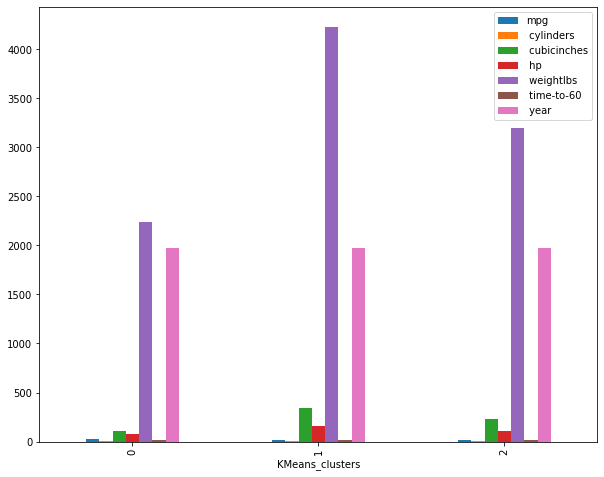

In [23]:
cars_df["KMeans_clusters"]=labels_kmeans
cars_df.groupby("KMeans_clusters").agg('mean').plot.bar(figsize=(10,8))

## Hierarchial Clustering

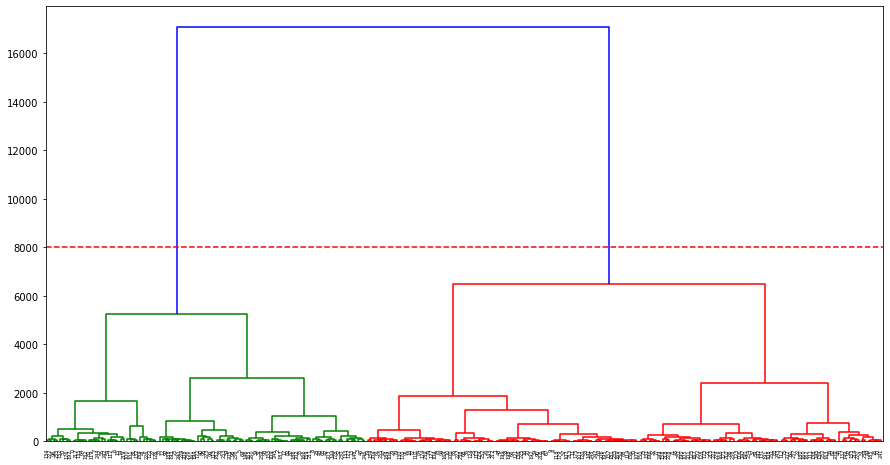

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(cars_df, method='ward')
plt.figure(figsize=(15,8))
dendrogram(linked, orientation = 'top',distance_sort = 'ascending', show_leaf_counts = True)
plt.hlines(8000, 0, 5000, colors='r', linestyles = 'dashed')
plt.show()

In [21]:
from sklearn.cluster import AgglomerativeClustering
agg_model = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean',linkage ='ward')
labels_agg = agg_model.fit_predict(cars_df)
labels_agg

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1])

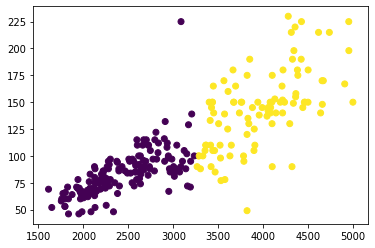

In [22]:
plt.scatter(cars_df[' weightlbs'],cars_df[' hp'],c=labels_agg)

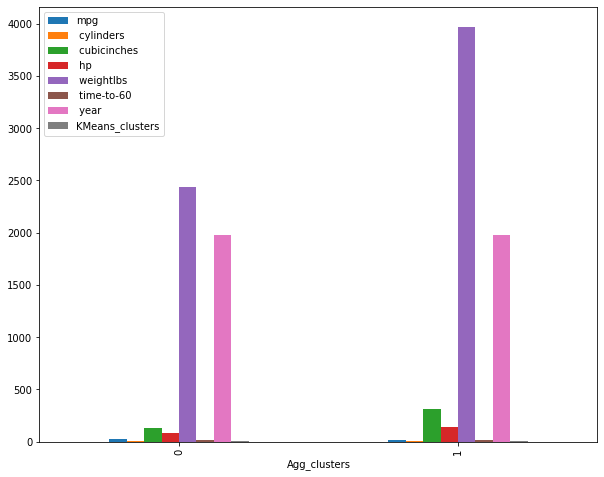

In [24]:
cars_df["Agg_clusters"]=labels_agg
cars_df.groupby("Agg_clusters").agg('mean').plot.bar(figsize=(10,8))